### Compara galaxias M31 con galaxias mock, disco y disco-bulge

In [40]:
import numpy as np

path = '/home/omarioni/Barras_GdGs/Barras_Gd/_data/Toomre/'
data = np.loadtxt(path + 'MWGD_496_toomre.dat')
MWGD_rbin   = data[:,0]
MWGD_sigmaz = data[:,1]
MWGD_sigmaR = data[:,2]
MWGD_surden = data[:,4]
MWGD_Vcirc  = data[:,5]
MWGD_Q      = data[:,6]
MWGD_kappa = MWGD_Q * 3.36 * 4.299e-6 * MWGD_surden / MWGD_sigmaR

In [41]:
import numpy as np

path = '/home/omarioni/Barras_GdGs/Barras_Gd/_data/Toomre/'
data = np.loadtxt(path + 'MWGS_1024_toomre.dat')
MWGS_rbin   = data[:,0]
MWGS_sigmaz = data[:,1]
MWGS_sigmaR = data[:,2]
MWGS_surden = data[:,4]
MWGS_Vcirc  = data[:,5]
MWGS_Q      = data[:,6]
MWGS_kappa = MWGS_Q * 3.36 * 4.299e-6 * MWGS_surden / MWGS_sigmaR

In [42]:
nbin = 1000
rbin = np.linspace(0,16,nbin)

QGD = np.interp(rbin, MWGD_rbin, MWGD_Q)
QGS = np.interp(rbin, MWGS_rbin, MWGS_Q)

sRGD = np.interp(rbin, MWGD_rbin, MWGD_sigmaR)
sRGS = np.interp(rbin, MWGS_rbin, MWGS_sigmaR)

SGD = np.interp(rbin, MWGD_rbin, MWGD_surden)
SGS = np.interp(rbin, MWGS_rbin, MWGS_surden)

KGD = np.interp(rbin, MWGD_rbin, MWGD_kappa)
KGS = np.interp(rbin, MWGS_rbin, MWGS_kappa)

In [43]:
diff = QGD-QGS

for i in range(nbin-1):
    if np.sign(diff[i]) != np.sign(diff[i+1]):
        print('Here!')
        print (rbin[i+1]+rbin[i])/2.

Here!
0.2802802802802803


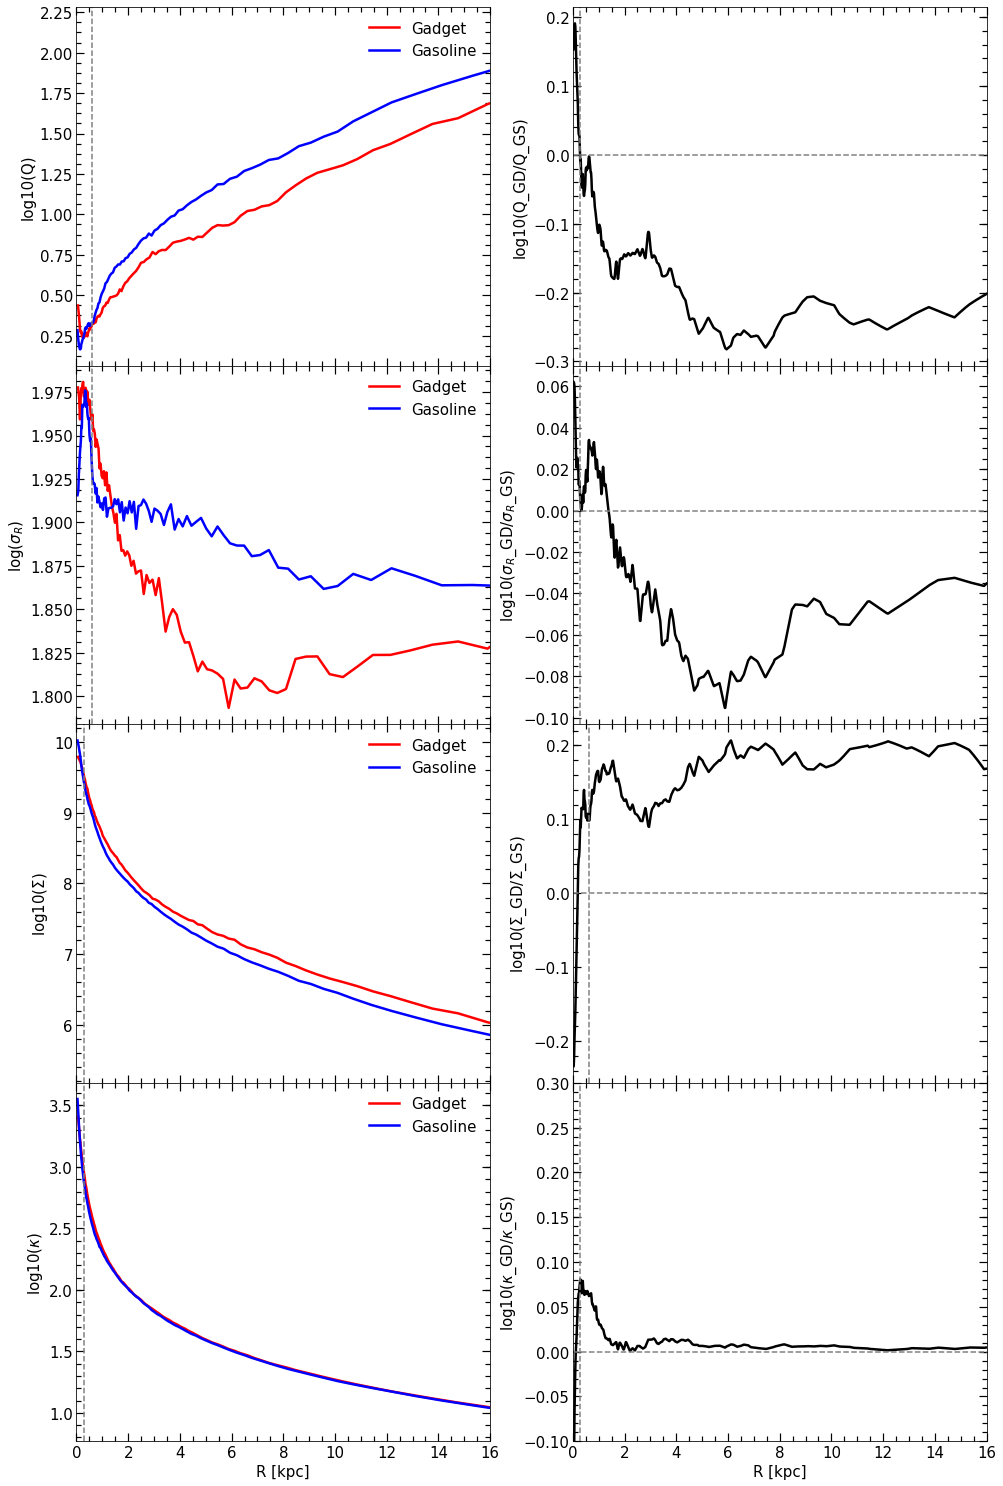

In [45]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(16, 24), sharex=True)
#                        gridspec_kw = {'height_ratios':[3,1,3,1]}
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95,hspace=0)

ax[0,0].plot(MWGD_rbin, np.log10(MWGD_Q), '-', lw=2.5, color='r', label= 'Gadget')
ax[0,0].plot(MWGS_rbin, np.log10(MWGS_Q), '-', lw=2.5, color='b', label= 'Gasoline')
ax[0,0].minorticks_on()
ax[0,0].tick_params( labelsize=15)
ax[0,0].tick_params('both', length=5, width=1.2,which='minor', direction='in', right=True,top=True)
ax[0,0].tick_params('both', length=8, width=1.2,which='major', direction='in', right=True,top=True)
ax[0,0].set_ylabel('log10(Q)',fontsize=15)
ax[0,0].set_xlim(0,16)
# ax[0,0].set_ylim(0.6,1)
ax[0,0].axvline(x=0.6166166166166167 ,ls='--',color='gray')
ax[0,0].legend(frameon=False, fontsize=15)

ax[0,1].plot(rbin, np.log10(QGD/QGS) , '-', lw=2.5, color='k')
ax[0,1].minorticks_on()
ax[0,1].tick_params( labelsize=15)
ax[0,1].tick_params('both', length=5, width=1.2,which='minor', direction='in', right=True,top=True)
ax[0,1].tick_params('both', length=8, width=1.2,which='major', direction='in', right=True,top=True)
ax[0,1].set_ylabel('log10(Q_GD/Q_GS)',fontsize=15)
ax[0,1].axvline(x=0.2802802802802803 ,ls='--',color='gray')
ax[0,1].axhline(y=0. ,ls='--',color='gray')

# ax[0,1].set_xlim(0,16)

ax[1,0].plot(MWGD_rbin, np.log10(MWGD_sigmaR),'-', lw=2.5, color='r', label= 'Gadget')
ax[1,0].plot(MWGS_rbin, np.log10(MWGS_sigmaR),'-', lw=2.5, color='b', label= 'Gasoline')
ax[1,0].minorticks_on()
ax[1,0].tick_params( labelsize=15)
ax[1,0].tick_params('both', length=5, width=1.2,which='minor', direction='in', right=True,top=True)
ax[1,0].tick_params('both', length=8, width=1.2,which='major', direction='in', right=True,top=True)
ax[1,0].set_ylabel('log($\sigma_R$)',fontsize=15)
# ax[1,0].set_xlim(0,16)
ax[1,0].axvline(x=0.6166166166166167 ,ls='--',color='gray')
ax[1,0].legend(frameon=False, fontsize=15)

ax[1,1].plot(rbin, np.log10(sRGD/sRGS),'-', lw=2.5, color='k')
ax[1,1].minorticks_on()
ax[1,1].tick_params( labelsize=15)
ax[1,1].tick_params('both', length=5, width=1.2,which='minor', direction='in', right=True,top=True)
ax[1,1].tick_params('both', length=8, width=1.2,which='major', direction='in', right=True,top=True)
ax[1,1].set_ylabel('log10($\sigma_R$_GD/$\sigma_R$_GS)',fontsize=15)
# ax[1,1].set_xlim(0,16)
ax[1,1].axvline(x=0.2802802802802803 ,ls='--',color='gray')
ax[1,1].axhline(y=0. ,ls='--',color='gray')
ax[1,1].legend(frameon=False, fontsize=15)


ax[2,0].plot(MWGD_rbin, np.log10(MWGD_surden),'-', lw=2.5, color='r', label= 'Gadget')
ax[2,0].plot(MWGS_rbin, np.log10(MWGS_surden),'-', lw=2.5, color='b', label= 'Gasoline')
ax[2,0].minorticks_on()
ax[2,0].tick_params( labelsize=15)
ax[2,0].tick_params('both', length=5, width=1.2,which='minor', direction='in', right=True,top=True)
ax[2,0].tick_params('both', length=8, width=1.2,which='major', direction='in', right=True,top=True)
ax[2,0].set_ylabel('log10($\Sigma$)',fontsize=15)
# ax[2,0].set_xlim(0,16)
ax[2,0].axvline(x=0.2802802802802803 ,ls='--',color='gray')
ax[2,0].legend(frameon=False, fontsize=15)

ax[2,1].plot(rbin, np.log10(SGD/SGS),'-', lw=2.5, color='k')
ax[2,1].minorticks_on()
ax[2,1].tick_params( labelsize=15)
ax[2,1].tick_params('both', length=5, width=1.2,which='minor', direction='in', right=True,top=True)
ax[2,1].tick_params('both', length=8, width=1.2,which='major', direction='in', right=True,top=True)
ax[2,1].set_ylabel('log10($\Sigma$_GD/$\Sigma$_GS)',fontsize=15)
# ax[2,1].set_xlim(0,16)
ax[2,1].axvline(x=0.6166166166166167 ,ls='--',color='gray')
ax[2,1].axhline(y=0. ,ls='--',color='gray')
ax[2,1].legend(frameon=False, fontsize=15)

ax[3,0].plot(MWGD_rbin, np.log10(MWGD_kappa),'-', lw=2.5, color='r', label= 'Gadget')
ax[3,0].plot(MWGS_rbin, np.log10(MWGS_kappa),'-', lw=2.5, color='b', label= 'Gasoline')
ax[3,0].minorticks_on()
ax[3,0].tick_params( labelsize=15)
ax[3,0].tick_params('both', length=5, width=1.2,which='minor', direction='in', right=True,top=True)
ax[3,0].tick_params('both', length=8, width=1.2,which='major', direction='in', right=True,top=True)
ax[3,0].set_ylabel('log10($\kappa$)',fontsize=15)
ax[3,0].set_xlabel('R [kpc]',fontsize=15)
# ax[3,0].set_xlim(0,16)
ax[3,0].axvline(x=0.2802802802802803 ,ls='--',color='gray')
ax[3,0].legend(frameon=False, fontsize=15)

ax[3,1].plot(rbin, np.log10(KGD/KGS),'-', lw=2.5, color='k')
ax[3,1].minorticks_on()
ax[3,1].tick_params( labelsize=15)
ax[3,1].tick_params('both', length=5, width=1.2,which='minor', direction='in', right=True,top=True)
ax[3,1].tick_params('both', length=8, width=1.2,which='major', direction='in', right=True,top=True)
ax[3,1].set_ylabel('log10($\kappa$_GD/$\kappa$_GS)',fontsize=15)
ax[3,1].set_xlabel('R [kpc]',fontsize=15)
ax[3,1].set_ylim(-0.1,0.3)
ax[3,1].axvline(x=0.2802802802802803 ,ls='--',color='gray')
ax[3,1].axhline(y=0. ,ls='--',color='gray')

fig.savefig('/home/omarioni/Barras_GdGs/Barras_Gd/_imagenes/Q_MWcomparison_GDGS_log.pdf', dpi = 100, xxbox_inches='tight')

plt.show()

In [24]:
import numpy as np

path = '/home/omarioni/Barras_GdGs/Barras_Gd/_data/Toomre/test/'
data = np.loadtxt(path + 'Q_test_mockM1c.dat')
MockM1c_rbin   = data[:,0]
MockM1c_sigmaz = data[:,1]
MockM1c_sigmaR = data[:,2]
MockM1c_surden = data[:,4]
MockM1c_Vcirc  = data[:,5]
MockM1c_rvc    = data[:,6]
MockM1c_Q      = data[:,7]
MockM1c_kappa  = data[:,8]

In [25]:
nbin = 1000
rbin = np.linspace(0,16,nbin)

QGD = np.interp(rbin, MWGD_rbin, MWGD_Q)
QGS = np.interp(rbin, MWGS_rbin, MWGS_Q)
Qmk = np.interp(rbin, MockM1c_rbin, MockM1c_Q)

sRGD = np.interp(rbin, MWGD_rbin, MWGD_sigmaR)
sRGS = np.interp(rbin, MWGS_rbin, MWGS_sigmaR)
sRmk = np.interp(rbin, MockM1c_rbin, MockM1c_sigmaR)

SGD = np.interp(rbin, MWGD_rbin, MWGD_surden)
SGS = np.interp(rbin, MWGS_rbin, MWGS_surden)
Smk = np.interp(rbin, MockM1c_rbin, MockM1c_surden)

KGD = np.interp(rbin, MWGD_rbin, MWGD_kappa)
KGS = np.interp(rbin, MWGS_rbin, MWGS_kappa)
Kmk = np.interp(rbin, MockM1c_rbin, MockM1c_kappa)

In [26]:
diff = Qmk-QGD

for i in range(nbin-1):
    if np.sign(diff[i]) != np.sign(diff[i+1]):
        print('Here!')
        print (rbin[i+1]+rbin[i])/2.

Here!
1.001001001001001
Here!
1.097097097097097
Here!
1.129129129129129
Here!
5.645645645645645


In [27]:
diff = Qmk-QGS

for i in range(nbin-1):
    if np.sign(diff[i]) != np.sign(diff[i+1]):
        print('Here!')
        print (rbin[i+1]+rbin[i])/2.

Here!
0.8408408408408408
Here!
7.583583583583584


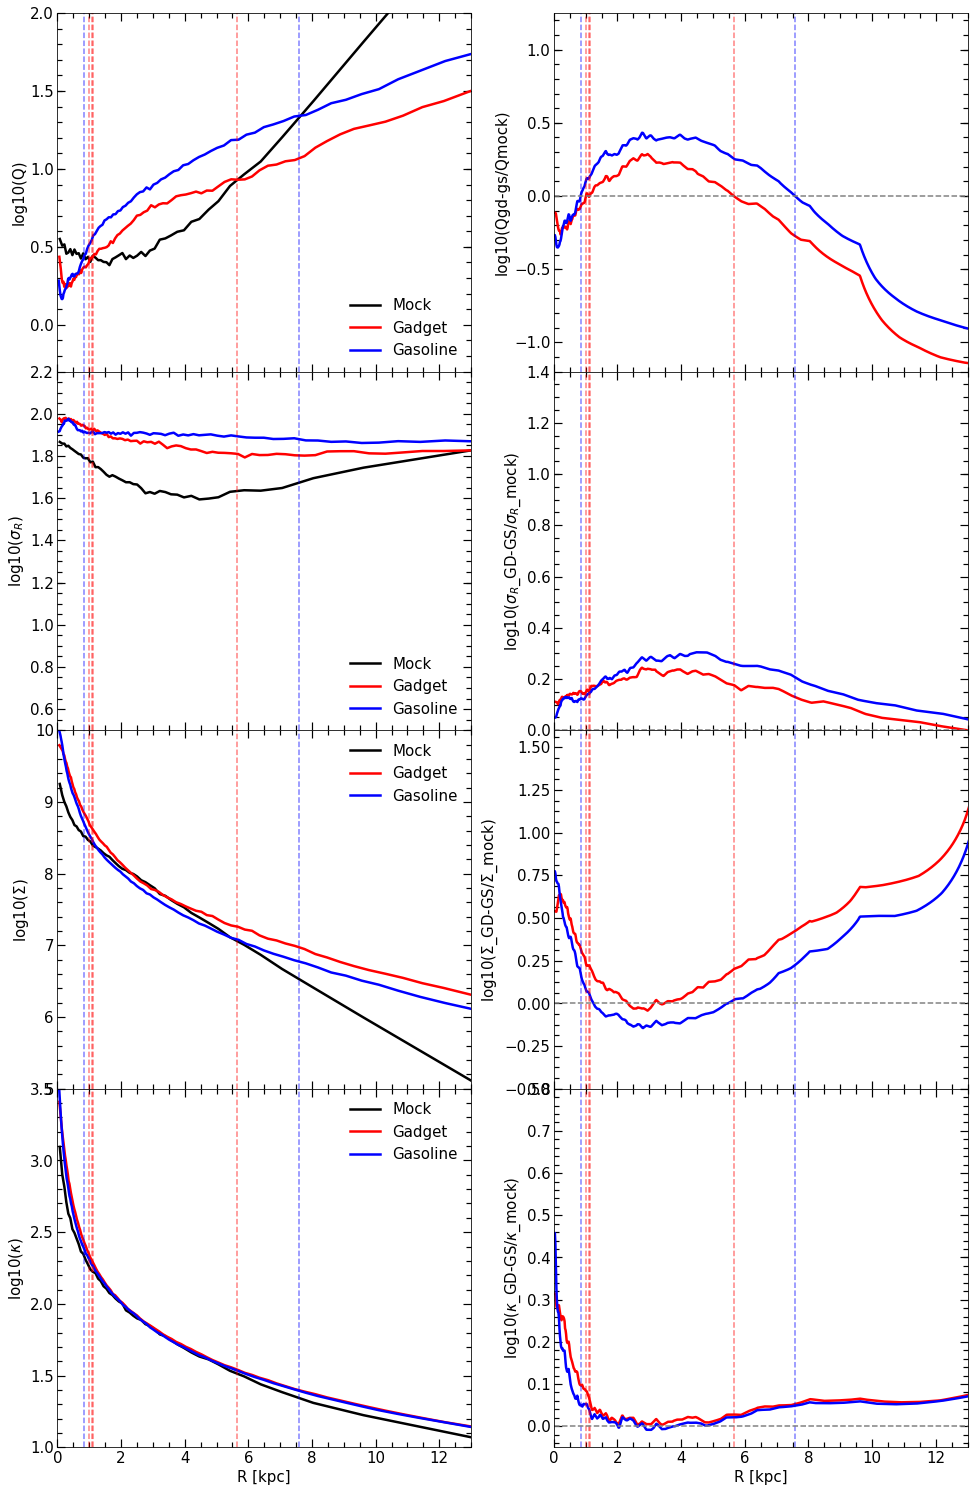

In [33]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(16, 24), sharex=True)
#                        gridspec_kw = {'height_ratios':[3,1,3,1]}
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95,hspace=0)

ax[0,0].plot(MockM1c_rbin, np.log10(MockM1c_Q), '-', lw=2.5, color='k', label= 'Mock')
ax[0,0].plot(MWGD_rbin, np.log10(MWGD_Q), '-', lw=2.5, color='r', label= 'Gadget')
ax[0,0].plot(MWGS_rbin, np.log10(MWGS_Q), '-', lw=2.5, color='b', label= 'Gasoline')
ax[0,0].minorticks_on()
ax[0,0].tick_params( labelsize=15)
ax[0,0].tick_params('both', length=5, width=1.2,which='minor', direction='in', right=True,top=True)
ax[0,0].tick_params('both', length=8, width=1.2,which='major', direction='in', right=True,top=True)
ax[0,0].set_ylabel('log10(Q)',fontsize=15)
ax[0,0].set_xlim(0,13)
ax[0,0].set_ylim(-0.3,2)
ax[0,0].axvline(x=1.001001001001001 ,ls='--',color='r',alpha=0.5)
ax[0,0].axvline(x=1.097097097097097 ,ls='--',color='r',alpha=0.5)
ax[0,0].axvline(x=1.129129129129129 ,ls='--',color='r',alpha=0.5)
ax[0,0].axvline(x=5.645645645645645 ,ls='--',color='r',alpha=0.5)
ax[0,0].axvline(x=0.8408408408408408 ,ls='--',color='b',alpha=0.5)
ax[0,0].axvline(x=7.583583583583584 ,ls='--',color='b',alpha=0.5)
ax[0,0].legend(frameon=False, fontsize=15)

ax[0,1].plot(rbin, np.log10(QGD/Qmk) , '-', lw=2.5, color='r')
ax[0,1].plot(rbin, np.log10(QGS/Qmk), '-', lw=2.5, color='b')
ax[0,1].minorticks_on()
ax[0,1].tick_params( labelsize=15)
ax[0,1].tick_params('both', length=5, width=1.2,which='minor', direction='in', right=True,top=True)
ax[0,1].tick_params('both', length=8, width=1.2,which='major', direction='in', right=True,top=True)
ax[0,1].set_ylabel('log10(Qgd-gs/Qmock)',fontsize=15)
ax[0,1].axvline(x=1.001001001001001 ,ls='--',color='r',alpha=0.5)
ax[0,1].axvline(x=1.097097097097097 ,ls='--',color='r',alpha=0.5)
ax[0,1].axvline(x=1.129129129129129 ,ls='--',color='r',alpha=0.5)
ax[0,1].axvline(x=5.645645645645645 ,ls='--',color='r',alpha=0.5)
ax[0,1].axvline(x=0.8408408408408408 ,ls='--',color='b',alpha=0.5)
ax[0,1].axvline(x=7.583583583583584 ,ls='--',color='b',alpha=0.5)
ax[0,1].axhline(y=0. ,ls='--',color='gray')
ax[0,1].set_ylim(-1.2,1.25)

ax[1,0].plot(MockM1c_rbin, np.log10(MockM1c_sigmaR),'-', lw=2.5, color='k', label= 'Mock')
ax[1,0].plot(MWGD_rbin, np.log10(MWGD_sigmaR),'-', lw=2.5, color='r', label= 'Gadget')
ax[1,0].plot(MWGS_rbin, np.log10(MWGS_sigmaR),'-', lw=2.5, color='b', label= 'Gasoline')
ax[1,0].minorticks_on()
ax[1,0].tick_params( labelsize=15)
ax[1,0].tick_params('both', length=5, width=1.2,which='minor', direction='in', right=True,top=True)
ax[1,0].tick_params('both', length=8, width=1.2,which='major', direction='in', right=True,top=True)
ax[1,0].set_ylabel('log10($\sigma_R$)',fontsize=15)
ax[1,0].set_ylim(0.5,2.2)
ax[1,0].axvline(x=1.001001001001001 ,ls='--',color='r',alpha=0.5)
ax[1,0].axvline(x=1.097097097097097 ,ls='--',color='r',alpha=0.5)
ax[1,0].axvline(x=1.129129129129129 ,ls='--',color='r',alpha=0.5)
ax[1,0].axvline(x=5.645645645645645 ,ls='--',color='r',alpha=0.5)
ax[1,0].axvline(x=0.8408408408408408 ,ls='--',color='b',alpha=0.5)
ax[1,0].axvline(x=7.583583583583584 ,ls='--',color='b',alpha=0.5)
ax[1,0].legend(frameon=False, fontsize=15)

ax[1,1].plot(rbin, np.log10(sRGD/sRmk),'-', lw=2.5, color='r')
ax[1,1].plot(rbin, np.log10(sRGS/sRmk),'-', lw=2.5, color='b')
ax[1,1].minorticks_on()
ax[1,1].tick_params( labelsize=15)
ax[1,1].tick_params('both', length=5, width=1.2,which='minor', direction='in', right=True,top=True)
ax[1,1].tick_params('both', length=8, width=1.2,which='major', direction='in', right=True,top=True)
ax[1,1].set_ylabel('log10($\sigma_R$_GD-GS/$\sigma_R$_mock)',fontsize=15)
ax[1,1].set_ylim(0.,1.4)
ax[1,1].axvline(x=1.001001001001001 ,ls='--',color='r',alpha=0.5)
ax[1,1].axvline(x=1.097097097097097 ,ls='--',color='r',alpha=0.5)
ax[1,1].axvline(x=1.129129129129129 ,ls='--',color='r',alpha=0.5)
ax[1,1].axvline(x=5.645645645645645 ,ls='--',color='r',alpha=0.5)
ax[1,1].axvline(x=0.8408408408408408 ,ls='--',color='b',alpha=0.5)
ax[1,1].axvline(x=7.583583583583584 ,ls='--',color='b',alpha=0.5)
ax[1,1].axhline(y=0. ,ls='--',color='gray')
ax[1,1].legend(frameon=False, fontsize=15)


ax[2,0].plot(MockM1c_rbin, np.log10(MockM1c_surden),'-', lw=2.5, color='k', label= 'Mock')
ax[2,0].plot(MWGD_rbin, np.log10(MWGD_surden),'-', lw=2.5, color='r', label= 'Gadget')
ax[2,0].plot(MWGS_rbin, np.log10(MWGS_surden),'-', lw=2.5, color='b', label= 'Gasoline')
ax[2,0].minorticks_on()
ax[2,0].tick_params( labelsize=15)
ax[2,0].tick_params('both', length=5, width=1.2,which='minor', direction='in', right=True,top=True)
ax[2,0].tick_params('both', length=8, width=1.2,which='major', direction='in', right=True,top=True)
ax[2,0].set_ylabel('log10($\Sigma$)',fontsize=15)
ax[2,0].set_ylim(5,10)
ax[2,0].axvline(x=1.001001001001001 ,ls='--',color='r',alpha=0.5)
ax[2,0].axvline(x=1.097097097097097 ,ls='--',color='r',alpha=0.5)
ax[2,0].axvline(x=1.129129129129129 ,ls='--',color='r',alpha=0.5)
ax[2,0].axvline(x=5.645645645645645 ,ls='--',color='r',alpha=0.5)
ax[2,0].axvline(x=0.8408408408408408 ,ls='--',color='b',alpha=0.5)
ax[2,0].axvline(x=7.583583583583584 ,ls='--',color='b',alpha=0.5)
ax[2,0].legend(frameon=False, fontsize=15)

ax[2,1].plot(rbin, np.log10(SGD/Smk),'-', lw=2.5, color='r')
ax[2,1].plot(rbin, np.log10(SGS/Smk),'-', lw=2.5, color='b')
ax[2,1].minorticks_on()
ax[2,1].tick_params( labelsize=15)
ax[2,1].tick_params('both', length=5, width=1.2,which='minor', direction='in', right=True,top=True)
ax[2,1].tick_params('both', length=8, width=1.2,which='major', direction='in', right=True,top=True)
ax[2,1].set_ylabel('log10($\Sigma$_GD-GS/$\Sigma$_mock)',fontsize=15)
ax[2,1].set_ylim(-0.5,1.6)
ax[2,1].axvline(x=1.001001001001001 ,ls='--',color='r',alpha=0.5)
ax[2,1].axvline(x=1.097097097097097 ,ls='--',color='r',alpha=0.5)
ax[2,1].axvline(x=1.129129129129129 ,ls='--',color='r',alpha=0.5)
ax[2,1].axvline(x=5.645645645645645 ,ls='--',color='r',alpha=0.5)
ax[2,1].axvline(x=0.8408408408408408 ,ls='--',color='b',alpha=0.5)
ax[2,1].axvline(x=7.583583583583584 ,ls='--',color='b',alpha=0.5)
ax[2,1].axhline(y=0. ,ls='--',color='gray')
ax[2,1].legend(frameon=False, fontsize=15)

ax[3,0].plot(MockM1c_rbin, np.log10(MockM1c_kappa),'-', lw=2.5, color='k', label= 'Mock')
ax[3,0].plot(MWGD_rbin, np.log10(MWGD_kappa),'-', lw=2.5, color='r', label= 'Gadget')
ax[3,0].plot(MWGS_rbin, np.log10(MWGS_kappa),'-', lw=2.5, color='b', label= 'Gasoline')
ax[3,0].minorticks_on()
ax[3,0].tick_params( labelsize=15)
ax[3,0].tick_params('both', length=5, width=1.2,which='minor', direction='in', right=True,top=True)
ax[3,0].tick_params('both', length=8, width=1.2,which='major', direction='in', right=True,top=True)
ax[3,0].set_ylabel('log10($\kappa$)',fontsize=15)
ax[3,0].set_xlabel('R [kpc]',fontsize=15)
ax[3,0].set_ylim(1,3.5)
ax[3,0].axvline(x=1.001001001001001 ,ls='--',color='r',alpha=0.5)
ax[3,0].axvline(x=1.097097097097097 ,ls='--',color='r',alpha=0.5)
ax[3,0].axvline(x=1.129129129129129 ,ls='--',color='r',alpha=0.5)
ax[3,0].axvline(x=5.645645645645645 ,ls='--',color='r',alpha=0.5)
ax[3,0].axvline(x=0.8408408408408408 ,ls='--',color='b',alpha=0.5)
ax[3,0].axvline(x=7.583583583583584 ,ls='--',color='b',alpha=0.5)
ax[3,0].legend(frameon=False, fontsize=15)

ax[3,1].plot(rbin, np.log10(KGD/Kmk),'-', lw=2.5, color='r')
ax[3,1].plot(rbin, np.log10(KGS/Kmk),'-', lw=2.5, color='b')
ax[3,1].minorticks_on()
ax[3,1].tick_params( labelsize=15)
ax[3,1].tick_params('both', length=5, width=1.2,which='minor', direction='in', right=True,top=True)
ax[3,1].tick_params('both', length=8, width=1.2,which='major', direction='in', right=True,top=True)
ax[3,1].set_ylabel('log10($\kappa$_GD-GS/$\kappa$_mock)',fontsize=15)
ax[3,1].set_xlabel('R [kpc]',fontsize=15)
ax[3,1].set_ylim(-0.05,0.8)
ax[3,1].axvline(x=1.001001001001001 ,ls='--',color='r',alpha=0.5)
ax[3,1].axvline(x=1.097097097097097 ,ls='--',color='r',alpha=0.5)
ax[3,1].axvline(x=1.129129129129129 ,ls='--',color='r',alpha=0.5)
ax[3,1].axvline(x=5.645645645645645 ,ls='--',color='r',alpha=0.5)
ax[3,1].axvline(x=0.8408408408408408 ,ls='--',color='b',alpha=0.5)
ax[3,1].axvline(x=7.583583583583584 ,ls='--',color='b',alpha=0.5)
ax[3,1].axhline(y=0. ,ls='--',color='gray')

fig.savefig('/home/omarioni/Barras_GdGs/Barras_Gd/_imagenes/Q_MWcomparison_mock_bulge_log.pdf', dpi = 100, xxbox_inches='tight')

plt.show()

In [34]:
import numpy as np

path = '/home/omarioni/Barras_GdGs/Barras_Gd/_data/Toomre/test/'
data = np.loadtxt(path + 'Q_test_mockD1b.dat')
MockD1b_rbin   = data[:,0]
MockD1b_sigmaz = data[:,1]
MockD1b_sigmaR = data[:,2]
MockD1b_surden = data[:,4]
MockD1b_Vcirc  = data[:,5]
MockD1b_rvc    = data[:,6]
MockD1b_Q      = data[:,7]
MockD1b_kappa  = data[:,8]

In [35]:
nbin = 1000
rbin = np.linspace(0,16,nbin)

QGD = np.interp(rbin, MWGD_rbin, MWGD_Q)
QGS = np.interp(rbin, MWGS_rbin, MWGS_Q)
Qmk = np.interp(rbin, MockD1b_rbin, MockD1b_Q)

sRGD = np.interp(rbin, MWGD_rbin, MWGD_sigmaR)
sRGS = np.interp(rbin, MWGS_rbin, MWGS_sigmaR)
sRmk = np.interp(rbin, MockD1b_rbin, MockD1b_sigmaR)

SGD = np.interp(rbin, MWGD_rbin, MWGD_surden)
SGS = np.interp(rbin, MWGS_rbin, MWGS_surden)
Smk = np.interp(rbin, MockD1b_rbin, MockD1b_surden)

KGD = np.interp(rbin, MWGD_rbin, MWGD_kappa)
KGS = np.interp(rbin, MWGS_rbin, MWGS_kappa)
Kmk = np.interp(rbin, MockD1b_rbin, MockD1b_kappa)


In [36]:
diff = Qmk-QGD

for i in range(nbin-1):
    if np.sign(diff[i]) != np.sign(diff[i+1]):
        print('Here!')
        print (rbin[i+1]+rbin[i])/2.

Here!
0.6806806806806807


In [37]:
diff = Qmk-QGS

for i in range(nbin-1):
    if np.sign(diff[i]) != np.sign(diff[i+1]):
        print('Here!')
        print (rbin[i+1]+rbin[i])/2.

Here!
0.6486486486486487


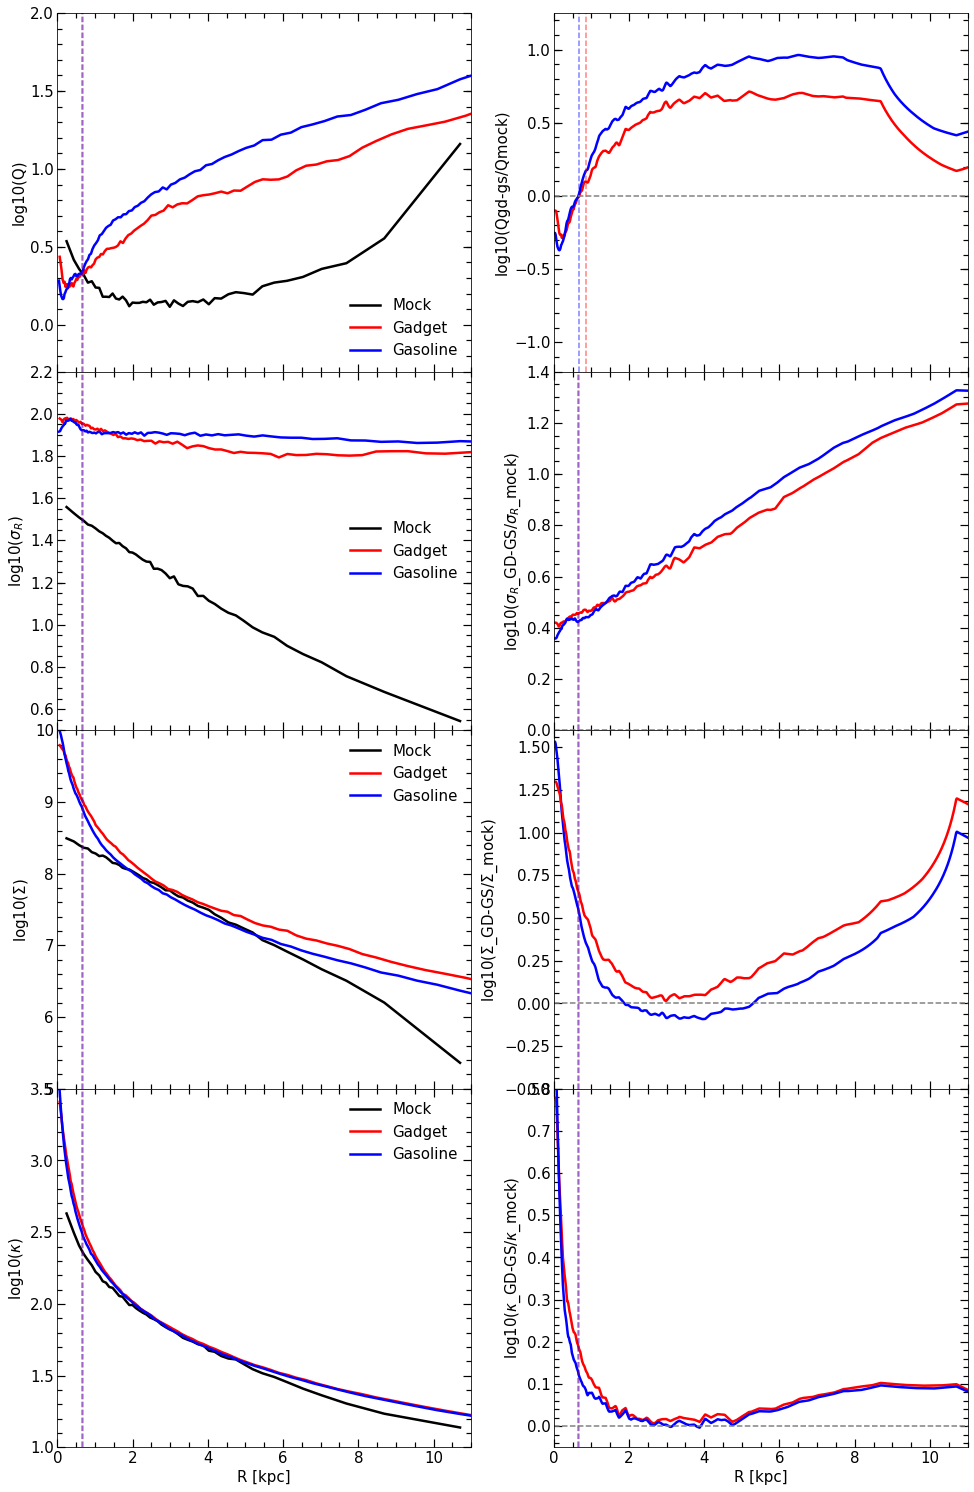

In [39]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(16, 24), sharex=True)
#                        gridspec_kw = {'height_ratios':[3,1,3,1]}
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95,hspace=0)

ax[0,0].plot(MockD1b_rbin, np.log10(MockD1b_Q), '-', lw=2.5, color='k', label= 'Mock')
ax[0,0].plot(MWGD_rbin, np.log10(MWGD_Q), '-', lw=2.5, color='r', label= 'Gadget')
ax[0,0].plot(MWGS_rbin, np.log10(MWGS_Q), '-', lw=2.5, color='b', label= 'Gasoline')
ax[0,0].minorticks_on()
ax[0,0].tick_params( labelsize=15)
ax[0,0].tick_params('both', length=5, width=1.2,which='minor', direction='in', right=True,top=True)
ax[0,0].tick_params('both', length=8, width=1.2,which='major', direction='in', right=True,top=True)
ax[0,0].set_ylabel('log10(Q)',fontsize=15)
ax[0,0].set_xlim(0,11)
ax[0,0].set_ylim(-0.3,2)
ax[0,0].axvline(x=0.6806806806806807 ,ls='--',color='r',alpha=0.5)
ax[0,0].axvline(x=0.6486486486486487 ,ls='--',color='b',alpha=0.5)
ax[0,0].legend(frameon=False, fontsize=15)

ax[0,1].plot(rbin, np.log10(QGD/Qmk) , '-', lw=2.5, color='r')
ax[0,1].plot(rbin, np.log10(QGS/Qmk), '-', lw=2.5, color='b')
ax[0,1].minorticks_on()
ax[0,1].tick_params( labelsize=15)
ax[0,1].tick_params('both', length=5, width=1.2,which='minor', direction='in', right=True,top=True)
ax[0,1].tick_params('both', length=8, width=1.2,which='major', direction='in', right=True,top=True)
ax[0,1].set_ylabel('log10(Qgd-gs/Qmock)',fontsize=15)
ax[0,1].axvline(x=0.8568568568568569 ,ls='--',color='r',alpha=0.5)
ax[0,1].axvline(x=0.6646646646646646 ,ls='--',color='b',alpha=0.5)
ax[0,1].axhline(y=0. ,ls='--',color='gray')
ax[0,1].set_ylim(-1.2,1.25)

ax[1,0].plot(MockD1b_rbin, np.log10(MockD1b_sigmaR),'-', lw=2.5, color='k', label= 'Mock')
ax[1,0].plot(MWGD_rbin, np.log10(MWGD_sigmaR),'-', lw=2.5, color='r', label= 'Gadget')
ax[1,0].plot(MWGS_rbin, np.log10(MWGS_sigmaR),'-', lw=2.5, color='b', label= 'Gasoline')
ax[1,0].minorticks_on()
ax[1,0].tick_params( labelsize=15)
ax[1,0].tick_params('both', length=5, width=1.2,which='minor', direction='in', right=True,top=True)
ax[1,0].tick_params('both', length=8, width=1.2,which='major', direction='in', right=True,top=True)
ax[1,0].set_ylabel('log10($\sigma_R$)',fontsize=15)
ax[1,0].set_ylim(0.5,2.2)
ax[1,0].axvline(x=0.6806806806806807 ,ls='--',color='r',alpha=0.5)
ax[1,0].axvline(x=0.6486486486486487 ,ls='--',color='b',alpha=0.5)
ax[1,0].legend(frameon=False, fontsize=15)

ax[1,1].plot(rbin, np.log10(sRGD/sRmk),'-', lw=2.5, color='r')
ax[1,1].plot(rbin, np.log10(sRGS/sRmk),'-', lw=2.5, color='b')
ax[1,1].minorticks_on()
ax[1,1].tick_params( labelsize=15)
ax[1,1].tick_params('both', length=5, width=1.2,which='minor', direction='in', right=True,top=True)
ax[1,1].tick_params('both', length=8, width=1.2,which='major', direction='in', right=True,top=True)
ax[1,1].set_ylabel('log10($\sigma_R$_GD-GS/$\sigma_R$_mock)',fontsize=15)
ax[1,1].set_ylim(0.,1.4)
ax[1,1].axvline(x=0.6806806806806807 ,ls='--',color='r',alpha=0.5)
ax[1,1].axvline(x=0.6486486486486487 ,ls='--',color='b',alpha=0.5)
ax[1,1].axhline(y=0. ,ls='--',color='gray')
ax[1,1].legend(frameon=False, fontsize=15)


ax[2,0].plot(MockD1b_rbin, np.log10(MockD1b_surden),'-', lw=2.5, color='k', label= 'Mock')
ax[2,0].plot(MWGD_rbin, np.log10(MWGD_surden),'-', lw=2.5, color='r', label= 'Gadget')
ax[2,0].plot(MWGS_rbin, np.log10(MWGS_surden),'-', lw=2.5, color='b', label= 'Gasoline')
ax[2,0].minorticks_on()
ax[2,0].tick_params( labelsize=15)
ax[2,0].tick_params('both', length=5, width=1.2,which='minor', direction='in', right=True,top=True)
ax[2,0].tick_params('both', length=8, width=1.2,which='major', direction='in', right=True,top=True)
ax[2,0].set_ylabel('log10($\Sigma$)',fontsize=15)
ax[2,0].set_ylim(5,10)
ax[2,0].axvline(x=0.6806806806806807 ,ls='--',color='r',alpha=0.5)
ax[2,0].axvline(x=0.6486486486486487 ,ls='--',color='b',alpha=0.5)
ax[2,0].legend(frameon=False, fontsize=15)

ax[2,1].plot(rbin, np.log10(SGS/Smk),'-', lw=2.5, color='b')
ax[2,1].plot(rbin, np.log10(SGD/Smk),'-', lw=2.5, color='r')
ax[2,1].minorticks_on()
ax[2,1].tick_params( labelsize=15)
ax[2,1].tick_params('both', length=5, width=1.2,which='minor', direction='in', right=True,top=True)
ax[2,1].tick_params('both', length=8, width=1.2,which='major', direction='in', right=True,top=True)
ax[2,1].set_ylabel('log10($\Sigma$_GD-GS/$\Sigma$_mock)',fontsize=15)
ax[2,1].set_ylim(-0.5,1.6)
ax[2,1].axvline(x=0.6806806806806807 ,ls='--',color='r',alpha=0.5)
ax[2,1].axvline(x=0.6486486486486487 ,ls='--',color='b',alpha=0.5)
ax[2,1].axhline(y=0. ,ls='--',color='gray')
ax[2,1].legend(frameon=False, fontsize=15)

ax[3,0].plot(MockD1b_rbin, np.log10(MockD1b_kappa),'-', lw=2.5, color='k', label= 'Mock')
ax[3,0].plot(MWGD_rbin, np.log10(MWGD_kappa),'-', lw=2.5, color='r', label= 'Gadget')
ax[3,0].plot(MWGS_rbin, np.log10(MWGS_kappa),'-', lw=2.5, color='b', label= 'Gasoline')
ax[3,0].minorticks_on()
ax[3,0].tick_params( labelsize=15)
ax[3,0].tick_params('both', length=5, width=1.2,which='minor', direction='in', right=True,top=True)
ax[3,0].tick_params('both', length=8, width=1.2,which='major', direction='in', right=True,top=True)
ax[3,0].set_ylabel('log10($\kappa$)',fontsize=15)
ax[3,0].set_xlabel('R [kpc]',fontsize=15)
ax[3,0].set_ylim(1,3.5)
ax[3,0].axvline(x=0.6806806806806807 ,ls='--',color='r',alpha=0.5)
ax[3,0].axvline(x=0.6486486486486487 ,ls='--',color='b',alpha=0.5)
ax[3,0].legend(frameon=False, fontsize=15)

ax[3,1].plot(rbin, np.log10(KGD/Kmk),'-', lw=2.5, color='r')
ax[3,1].plot(rbin, np.log10(KGS/Kmk),'-', lw=2.5, color='b')
ax[3,1].minorticks_on()
ax[3,1].tick_params( labelsize=15)
ax[3,1].tick_params('both', length=5, width=1.2,which='minor', direction='in', right=True,top=True)
ax[3,1].tick_params('both', length=8, width=1.2,which='major', direction='in', right=True,top=True)
ax[3,1].set_ylabel('log10($\kappa$_GD-GS/$\kappa$_mock)',fontsize=15)
ax[3,1].set_xlabel('R [kpc]',fontsize=15)
ax[3,1].set_ylim(-0.05,0.8)
ax[3,1].axvline(x=0.6806806806806807 ,ls='--',color='r',alpha=0.5)
ax[3,1].axvline(x=0.6486486486486487 ,ls='--',color='b',alpha=0.5)
ax[3,1].axhline(y=0. ,ls='--',color='gray')

fig.savefig('/home/omarioni/Barras_GdGs/Barras_Gd/_imagenes/Q_MWcomparison_mock_disc_log.pdf', dpi = 100, xxbox_inches='tight')

plt.show()